# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### <font color='blue'>Задачи исследования:</font>

### <font color='green'>Получение данных и их просмотр:</font>

<font color='brown'> Просмотр входных данных и работа с ними: удаление дубликатов, пропусков. \
Поиск аномальных значений \
Предварительные выводы об опубликованных объявлениях </font>

### <font color='green'>Обработка данных</font>

<font color='brown'> - Найти и обработать пропуски \
    - поработать с дубликатами \
    - удалить пропуски \ 
    - удалить аномальные значения \
    - удалить дубликаты \
    добавить: \
    - цена одного квадратного метра \
    - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)\
    - месяц публикации объявления \
    - год публикации объявления\
    -тип этажа квартиры (значения — «первый», «последний», «другой»)\
    - расстояние в км до центра города </font>

### <font color='green'>Вопросы исследования</font>

<font color='brown'> - Как быстро продаются квартиры? Сколько обычно занимает продажа? Какие продажи можно считать быстрыми, а какие — необычно долгими? \
    - Какие факторы больше всего влияют на общую (полную) стоимость объекта?\
    - Какая средняя цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений? Где самая высокая и низкая стоимость квадратного метра?\
    - Какая стоимость близости квартиры к центру Санкт-Петербурга? И есть ли зависимость?</font>

### <font color='green'>Результаты исследования</font>

<font color='brown'> - Выводы\
    - Рекомендации </font>

### Откройте файл с данными и изучите общую информацию. 

**Описание данных**
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)\
balcony — число балконов\
ceiling_height — высота потолков (м)\
cityCenters_nearest — расстояние до центра города (м)\
days_exposition — сколько дней было размещено объявление (от публикации до снятия)\
first_day_exposition — дата публикации\
floor — этаж\
floors_total — всего этажей в доме\
is_apartment — апартаменты (булев тип)\
kitchen_area — площадь кухни в квадратных метрах (м²)\
last_price — цена на момент снятия с публикации\
living_area — жилая площадь в квадратных метрах (м²)\
locality_name — название населённого пункта\
open_plan — свободная планировка (булев тип)\
parks_around3000 — число парков в радиусе 3 км\
parks_nearest — расстояние до ближайшего парка (м)\
ponds_around3000 — число водоёмов в радиусе 3 км\
ponds_nearest — расстояние до ближайшего водоёма (м)\
rooms — число комнат\
studio — квартира-студия (булев тип)\
total_area — общая площадь квартиры в квадратных метрах (м²)\
total_images — число фотографий квартиры в объявлении\

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
data = pd.read_csv('/Users/temp/Desktop/real_estate_data.csv', sep = '\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data = data.rename(columns ={'cityCenters_nearest':'city_сenters_nearest'}) 

Переименуем сразу cityCenters_nearest, чтобы он был в привычной "змеином"

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Если нам понадобится first_day_exposition, то надо будет переделать в datetime + проверить is_apartment это должно быть булевое значение

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_сenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], 

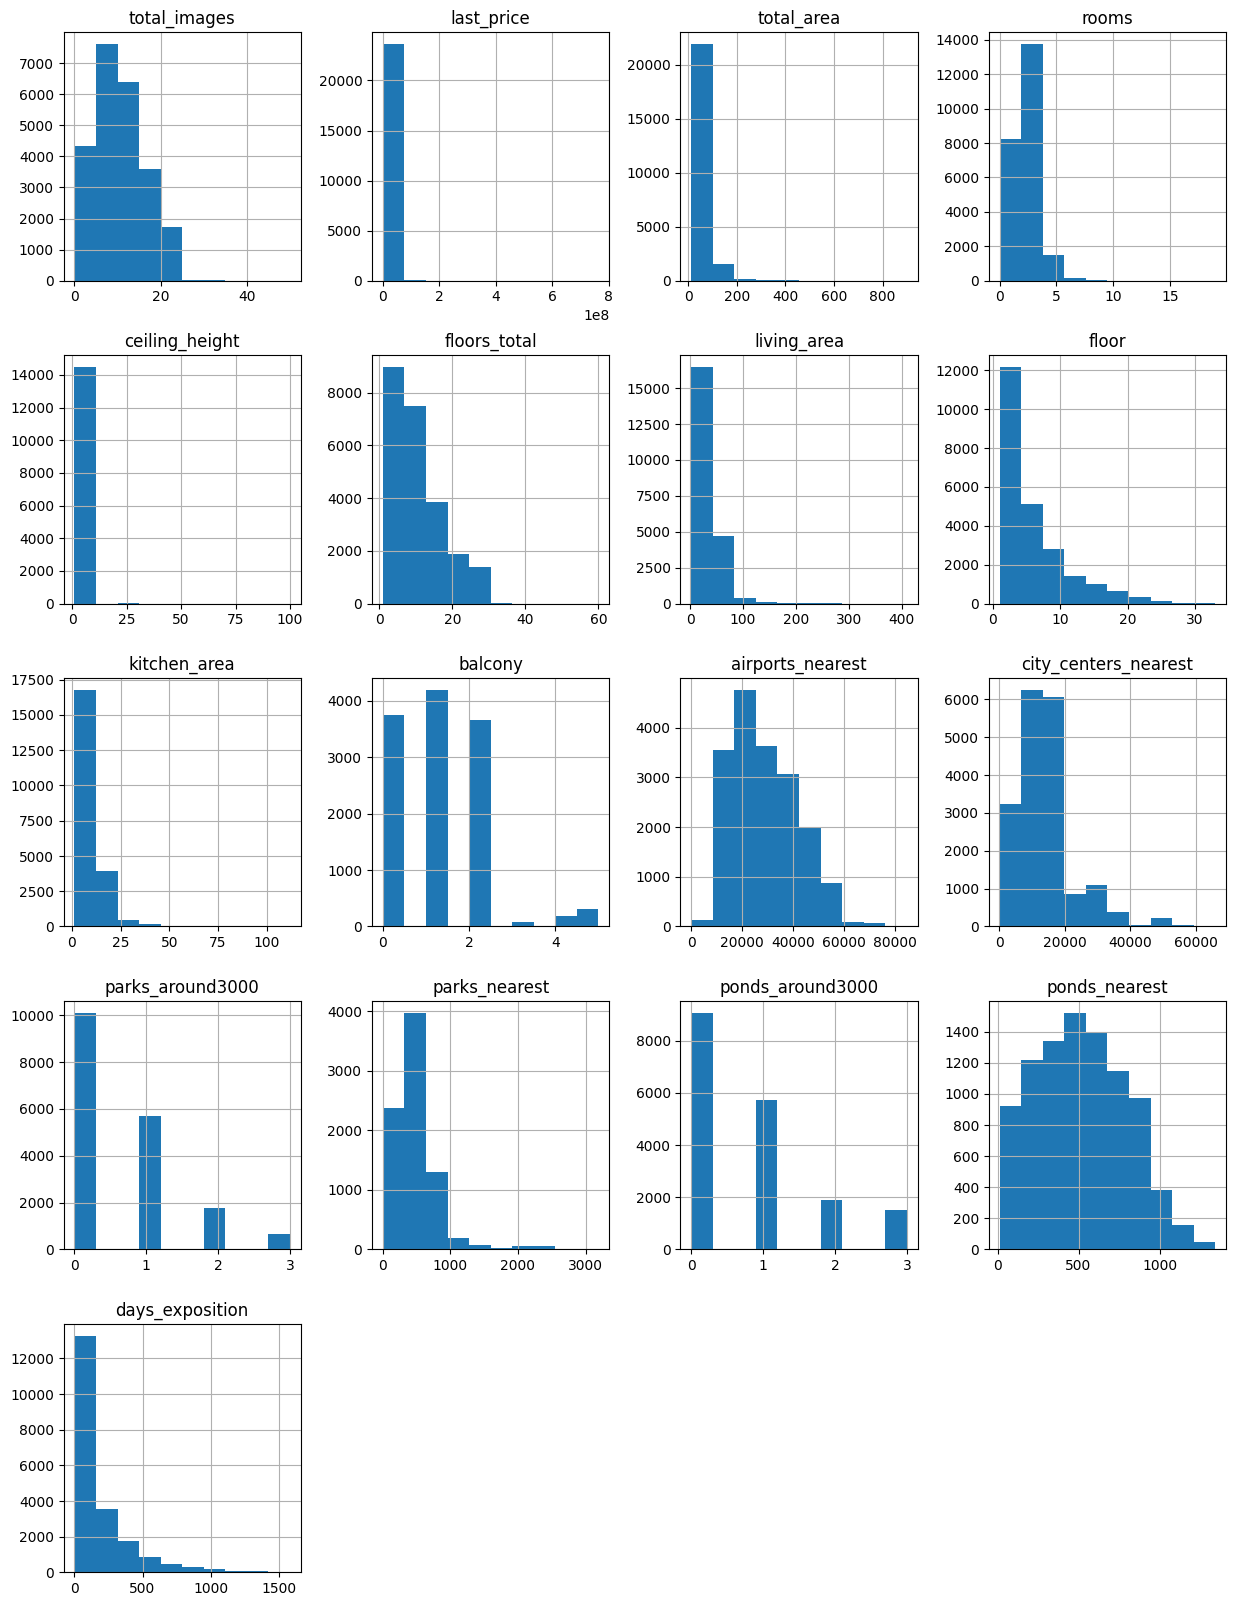

In [6]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [7]:
data.duplicated().sum()

0

Проверим на наличие дубликатов - явных не оказалось, но могут быть какие-то неявные 

In [8]:
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_сenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [9]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Сразу заметно, что airports_neares, ponds_nearest, parks_nearest в метрах (неудобно, лучше будет в км сделать)\
Непонятно пока, в каких единицах выражена цена (last_price) наверное в млн?\
Есть аномальные значения в total_area (площадь могла быть 900 м2? скорее всего это будет выброс) \
Есть аномальные значения в rooms (19 это довольно много), в ceiling_height (потолок не может быть 100м2)\
c living_area и kitchen_area тоже есть вопросы насчет максимума


In [10]:
data['is_apartment'].isna().sum()

20924

In [11]:
data['total_area'].sum()

1430202.6800000002

In [12]:
data.isna().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_сenters_nearest     5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Очень много пропусков по некоторым значениям. 
1) высота потолка (если будет нужна - можно заменить медианой) \
2) floors_total (всего этажей) \
3) living_area (жилая площадь) \
4) is_apartment - надо как-то определить апартаменты это или нет?\
5) kitchen_area - можно заполнить медианой\
6) balcony - может балкона просто нет?\
7) locality_name пропусков мало, поэтому можно будет просто исключить из выборки если нам вдруг понадобиться анализ по городам \
8) airports_nearest, city_сenters_nearest, parks_around3000, ponds_around3000 - пока непонятно, как заполнить и надо ли это делать. \
9) parks_nearest и ponds_nearest пропусков очень много, возможно заполнять эти данные чем-то будет неправильно, поэтому для анализа эти данные лучше не брать  \
10) days_exposition возможно можно посчитать с помощью first_day_exposition

In [13]:
(data.isna().sum()/ data.shape[0]).sort_values(ascending = False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_сenters_nearest    0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

**Удаление дубликатов в locality_name**

In [14]:
data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [15]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [16]:
len(data['locality_name'].unique())

331

In [17]:
data['locality_name'].isna().sum()

49

Так как узнать из какого населенного пункта квартира - невозможно и заменить это нельзя, то можно удалить (тем более количество 49 - не критичное)

In [18]:
data = data.dropna(subset=['locality_name'])

In [19]:
data['locality_name'].isna().sum()

0

По сути, названия населеных пунктов уникальны (за исключением ошибок в написании). Конечно, может быть деревня "Х" и поселок "Х" и это будут разные населенные пункты. Но в пределах одной области такие совпадения редки. А вот что случается гораздо чаще, так это ситуации, когда люди могут путать деревню/село/поселок или давать дополнительное описание, как "поселок городского типа". Поэтому если мы уберем характеристику места и оставим лишь название, то получаться уникальные значения. 

In [20]:
data['locality_name'] = data['locality_name'].str.replace('деревня', '', regex=True)

In [21]:
len(data['locality_name'].unique())

330

In [22]:
data.duplicated().count()

23650

In [23]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городского типа', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', '', regex=True)

In [24]:
len(data['locality_name'].unique())

313

In [25]:
data['locality_name'].unique().tolist()

['Санкт-Петербург',
 ' Шушары',
 ' Янино-1',
 ' Парголово',
 ' Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 ' Кудрово',
 'Коммунар',
 'Колпино',
 ' Красный Бор',
 'Гатчина',
 ' Федоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 ' Новое Девяткино',
 ' Металлострой',
 ' Лебяжье',
 ' Сиверский',
 ' Молодцово',
 ' Кузьмоловский',
 ' Новая Ропша',
 'Павловск',
 ' Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 ' Куттузи',
 ' Аннино',
 ' Ефимовский',
 ' Плодовое',
 ' Заклинье',
 ' Торковичи',
 ' Первомайское',
 'Красное Село',
 ' Понтонный',
 'Сясьстрой',
 ' Старая',
 ' Лесколово',
 ' Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 'Мурино',
 'Шлиссельбург',
 'Никольское',
 'Зеленогорск',
 'Сосновый Бор',
 ' Оржицы',
 ' Кальтино',
 'Кудрово',
 ' Романовка',
 ' Бугры',
 ' Рощино',
 'Кириши',
 'Луга',
 'Волосово',
 'Отрадное',
 'село Павлово',
 ' Оредеж',
 'село Копорье',
 ' Молодежное',
 'Тихвин',
 ' Победа',
 ' Нурма',
 ' Синявино'

Посмотрим на ceiling_height (высота потолков) 

In [26]:
data['ceiling_height'].count()

14490

In [27]:
(data['ceiling_height'].unique())

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Отметим, что квартирах старого жилого фонда, ещё дореволюционной эпохи, высота потолков была очень разной — от 2,2 до 4,5 м.
В сталинках, где могли жить, как правило, только высшие слои общества, потолки были такими, какие сейчас есть даже не во всех домах класса элит, — от 3 до 3,5 м. Эпоха хрущёвок характеризовалась минимализмом, что отразилось и на высоте потолков — она составляла порядка 2,5 м.  \ 
Есть и элитные квартиры, где поток может быть 6-7 метров (но это уже редкость) Поэтому если высота потолка выше пусть 6 м, значит точно есть ошибка и желательно попробовать разделить на 10 \
Но при это поток не может быть ниже 2-х метров\
Столбцыы, которые выбиваются (меньше 2-х метров), будут заменены на медианное значение

In [28]:
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = data['ceiling_height']/10
data.loc[data['ceiling_height'] <= 0.5, 'ceiling_height'] = data['ceiling_height']*10
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = data['ceiling_height'].median()

In [29]:
(data['ceiling_height'].unique())

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.  ,  2.79,
        2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,  2.4 ,
        3.38,  3.01,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,  3.57,  2.48,
        2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,  3.75,  2.88,
        3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,  4.8 ,  4.5 ,
        4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,  3.26,  3.34,
        2.81,  3.44,  2.97,  3.14,  4.37,  2.68,  3.22,  3.27,  4.1 ,
        2.93,  3.46,  3.47,  3.33,  3.63,  3.32,  2.98,  2.86,  3.17,
        4.4 ,  3.28,

In [30]:
data['ceiling_height'].max()

10.0

In [31]:
data['ceiling_height'].min()

2.0

In [32]:
data['ceiling_height'].median()

2.65

In [33]:
data['ceiling_height'].isna().sum()

9160

In [34]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [35]:
data['ceiling_height'].isna().sum()

0

In [36]:
len(data['total_area'])

23650

In [37]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Гипотеза: Есть аномальные значения в total_area (площадь могла быть 900 м2? скорее всего это будет выброс) 

**не закончено Лучше всего ограничиться квартирами, чья площадь "нормальная" и не больше 250м2. Также важно учесть, что согласно нормам, зафиксированным в Жилищном кодексе, на 1 члена семьи должно приходиться 13,65 метра квадратного общей площади. А жилой – минимум 9 м2.**

Если говорить о сегменте эконом-класса, то здесь к крупным квартирам можно отнести квартиры площадью более 100 кв. м. Доля таких квартир в общем объеме предложения на рынке новостроек в сегменте эконом/комфорт класса составляет порядка 7%. Среди самых крупных можно отметить пятикомнатную квартиру площадью 195 кв. м.
Очень редко встречаются квартиры, когда площадь больше. \
В настоящее время в Москве максимальная площадь квартиры, предлагаемой на первичном рынке элитных новостроек, составляет 830 кв. м. «В целом крупных квартир (более 500 кв. м) на рынке элитных новостроек насчитывается около 20 (порядка 2% рынка)- в нашем случае эти данные можно считать выбросами, потому что такие квартиры скорее редкость, чем правило

<AxesSubplot:>

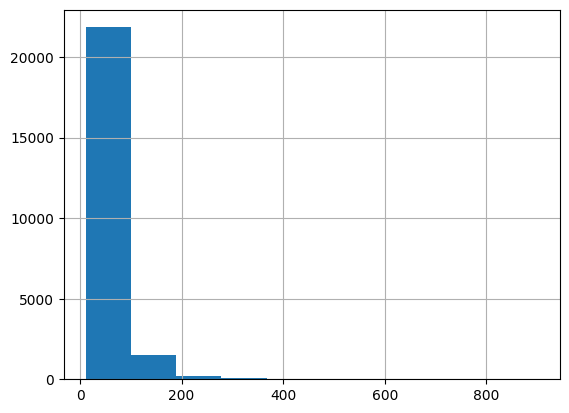

In [38]:
data['total_area'].hist()

Как мы видим, наше предположение верно и квартиры с площадью выше 200 встречаются намного реже.

In [39]:
data = data[(data['total_area'] > 15) & (data['total_area'] < 200)]
len(data)

23411

In [40]:
data['total_area'].max()

199.2

In [41]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [42]:
data['balcony'].isna().sum()

11385

In [43]:
data['balcony'] = data['balcony'].fillna(0)

In [44]:
data['balcony'].isna().sum()

0

In [45]:
data['balcony'].value_counts().sort_values()

3.0       78
4.0      180
5.0      301
2.0     3651
1.0     4145
0.0    15056
Name: balcony, dtype: int64

Теперь с балконами все нормально. Где продавец не указал их количество, то будем считать, что балконов нет.

In [46]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23411.000000,2.341100e+04,23411.000000,23411.000000,23411.000000,23327.000000,21547.000000,23411.000000,21179.000000,23411.000000,17885.000000,17905.000000,17906.000000,7909.000000,17906.000000,8917.000000,20283.000000
mean,9.839221,6.022452e+06,58.146508,2.034044,2.692118,10.719424,33.234197,5.904959,10.381350,0.593994,28833.896450,14289.765429,0.603541,491.973701,0.762370,520.180218,179.588227
std,5.666831,6.230595e+06,26.447258,0.995416,0.211964,6.603819,17.342703,4.892914,5.362994,0.960473,12683.848965,8591.215367,0.794161,343.351563,0.933472,277.572259,218.390392
min,0.000000,1.219000e+04,15.500000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18503.000000,9436.000000,0.000000,288.000000,0.000000,297.000000,45.000000
50%,9.000000,4.600000e+06,51.800000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26831.000000,13163.000000,0.000000,456.000000,0.000000,503.000000,95.000000
75%,14.000000,6.700000e+06,68.800000,3.000000,2.700000,16.000000,42.000000,8.000000,12.000000,1.000000,37368.000000,16332.000000,1.000000,613.000000,1.000000,732.000000,229.000000
max,50.000000,3.300000e+08,199.200000,11.000000,10.000000,60.000000,164.700000,33.000000,93.200000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [47]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [48]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

<AxesSubplot:>

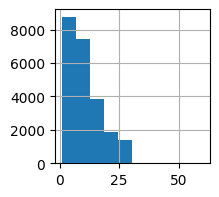

In [49]:
data['floors_total'].hist(figsize = (2, 2))

По сути, дома выше 30 этажей - редкость. Основные дома, где продаются квартиры - ниже 25 этажей. Поэтому значения выше 30 можно исключить из исследования. 

In [50]:
len(data)

23411

In [51]:
data = data[data['floors_total'] < 30]

In [52]:
len(data)

23295

<AxesSubplot:>

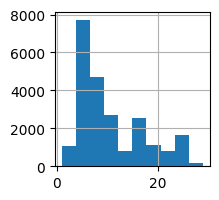

In [53]:
data['floors_total'].hist(figsize = (2, 2))

Уже лучше.

<AxesSubplot:>

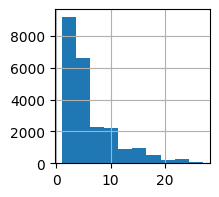

In [54]:
data['floor'].hist(figsize = (2, 2))

Большая часть квартир находится на нижних этажах. Но нужно определить на каком этаже, разделим на категории. 

In [55]:
def floor_value(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [56]:
data['floor_value'] = data.apply(floor_value, axis=1)

In [57]:
data.sample(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_value
23358,7,5500000.0,57.0,2016-05-07T00:00:00,3,2.5,5.0,36.6,5,NaN,...,0.0,Пушкин,17236.0,29389.0,1.0,245.0,1.0,928.0,397.0,последний
1065,8,7700000.0,96.0,2018-07-10T00:00:00,4,2.7,16.0,64.0,2,NaN,...,0.0,Санкт-Петербург,33953.0,14255.0,1.0,227.0,2.0,277.0,61.0,другой


Всё получилось, теперь легко понять, это первый этаж, последний этаж или же какой-то другой

Разберёмся с датой публикации

In [58]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_value
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,другой


Есть выбивающиеся значения для цены квартиры (есть очень низкие значения)

In [59]:
data['last_price'].median()

4600000.0

Как мы видим, медиана цены квартиры находится на уровне 4,6 млн.

In [60]:
data['last_price'].min()

12190.0

In [61]:
data['last_price'].max()

330000000.0

Минимальное и максимальное значения выглядят аномальными.

Непонятно, насколько сильной могла быть ошибка при вводе. Это 1,2 млн или 12 млн? Непонятно. Поэтому подобные значения сложно исправить и их лучше удалить

In [62]:
data['last_price'].describe()

count    2.329500e+04
mean     6.020134e+06
std      6.240406e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.695000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [63]:
len(data)

23295

### Посчитайте и добавьте в таблицу новые столбцы

In [64]:
from datetime import datetime

Добавим столбец day_of_week

In [65]:
data['day_of_week']= pd.to_datetime(data['first_day_exposition']).dt.dayofweek
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_value,day_of_week
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,другой,3
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,первый,1
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,другой,3
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,другой,4
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,другой,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,другой,1
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,...,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,другой,0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,NaN,...,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,первый,6
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,другой,1


Создадим столбец с названием месяца

In [66]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month 

Создадим столбец с годом публикации

In [67]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_value,day_of_week,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,другой,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,первый,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,другой,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,другой,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,другой,1,6,2018


Уберем метры из столбцов с прудами, аэропортами, парками и центрами городов, приведем все к километрам

In [68]:
data['city_сenters_nearest_km'] = data['city_сenters_nearest'] / 1000
data['airports_nearest_km'] = data['airports_nearest'] / 1000
data['ponds_nearest_km'] = data['ponds_nearest'] / 1000
data['parks_nearest_km'] = data['parks_nearest'] / 1000
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_value,day_of_week,month,year,city_сenters_nearest_km,airports_nearest_km,ponds_nearest_km,parks_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,NaN,другой,3,3,2019,16.028,18.863,0.755,0.482
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,NaN,81.0,первый,1,12,2018,18.603,12.817,NaN,NaN
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,574.0,558.0,другой,3,8,2015,13.933,21.741,0.574,0.090
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,234.0,424.0,другой,4,7,2015,6.800,28.098,0.234,0.084
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,другой,1,6,2018,8.098,31.856,0.048,0.112


In [69]:
data['price_of_meter'] = data['last_price'] / data ['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,floor_value,day_of_week,month,year,city_сenters_nearest_km,airports_nearest_km,ponds_nearest_km,parks_nearest_km,price_of_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,NaN,другой,3,3,2019,16.028,18.863,0.755,0.482,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,81.0,первый,1,12,2018,18.603,12.817,NaN,NaN,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,558.0,другой,3,8,2015,13.933,21.741,0.574,0.090,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,424.0,другой,4,7,2015,6.800,28.098,0.234,0.084,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,121.0,другой,1,6,2018,8.098,31.856,0.048,0.112,100000.000000


In [70]:
data['price_of_meter'].describe()

count    2.329500e+04
mean     9.837626e+04
std      4.574367e+04
min      1.118349e+02
25%      7.645144e+04
50%      9.480519e+04
75%      1.138516e+05
max      1.736842e+06
Name: price_of_meter, dtype: float64

Есть как очень большие значения по цене квадратного метра, так и очень низкие. Медианное значение около 100 тыс. рублей. 25% это около 76 тыс. рублей, а 75% около 113 тыс. рублей. В нашем случае, наименее правдоподобными будут цены меньше 50 тыс. рублей и выше 150 тыс. рублей.

<AxesSubplot:>

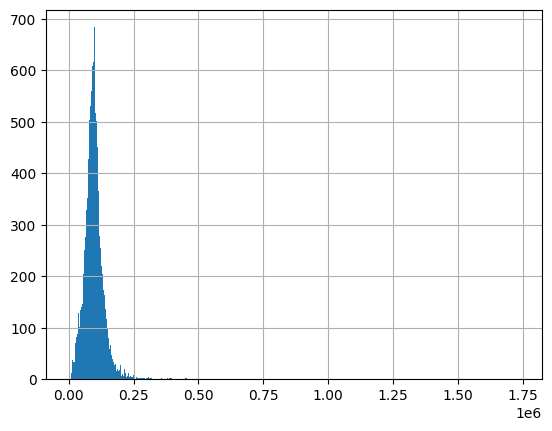

In [71]:
data['price_of_meter'].hist(bins = 1000)

In [72]:
len(data)

23295

In [73]:
new_data = data[(data['price_of_meter'] > 50) & (data['price_of_meter'] < 150000)].copy()
len(new_data)

21754

Так лучше, потому что устранены неправдоподобные значения для цены квадратного метра. Дальше будет работать с new_data

### Проведите исследовательский анализ данных

***Общая и жилая площадь***

Обычно, разница между общей площадью и жилой площадью невелика. В нашем случае большинство квартир имеют площадь от 30 до 70 м2. Логично, что площадь жилого помещения будет меньше, но слишком большой пик наблюдается у жилой площади около 20 м2. Надо посмотреть подробнее.

In [74]:
new_data['living_area'].describe()


count    20085.000000
mean        32.461360
std         16.415487
min          2.000000
25%         18.400000
50%         30.000000
75%         41.300000
max        164.700000
Name: living_area, dtype: float64

Важно, что стандартный минимальный метраж жилой площади — 18 кв. м на 1 человека, однако этот показатель применяют, если в квартире живут 3 и более человек. Человеку, живущему отдельно, полагается 33 кв. м, для 2 жильцов — 42 кв. м. В нашем случае то, что ниже 18 м2 можно не брать в расчёт.

In [75]:
new_data = new_data[new_data['living_area'] > 18]

In [76]:
new_data['living_area'].describe()

count    15306.000000
mean        37.494172
std         15.694313
min         18.020000
25%         28.000000
50%         33.200000
75%         44.000000
max        164.700000
Name: living_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

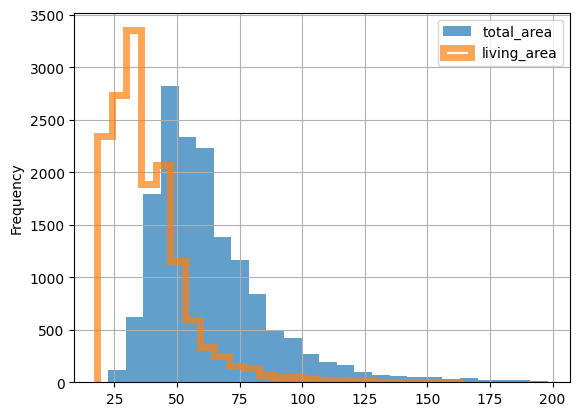

In [77]:
ax = new_data.plot(
    kind='hist',
    y='total_area',
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='total_area',
)
new_data.plot(
    kind='hist',
    y='living_area',
    histtype='step',
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='living_area',
    ax=ax,
    grid=True,
    legend=True,
)


***Площадь кухни***

In [79]:
new_data['kitchen_area'].describe()

count    14845.000000
mean        10.080048
std          4.724022
min          1.300000
25%          7.000000
50%          9.000000
75%         11.600000
max         65.000000
Name: kitchen_area, dtype: float64

Отметим, что кухня должна иметь площадь не менее 8 квадратных метров в то же время для однокомнатных квартир существуют минимальные требования по площади кухни в 6 квадратных метров.

In [80]:
new_data = new_data[new_data['kitchen_area'] > 6]
len(new_data)

12677

<AxesSubplot:>

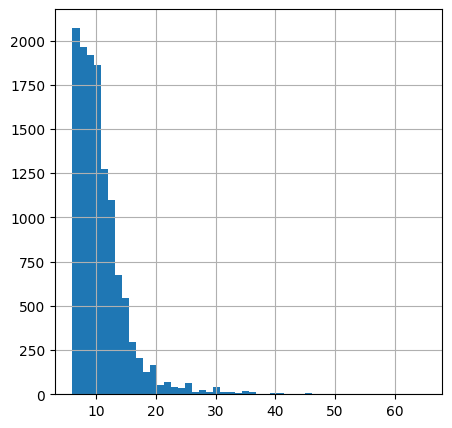

In [140]:
new_data['kitchen_area'].hist(bins = 50, figsize= (5,5))

Кухни у опубликованных квартиры не очень большие. Наиболее часто встречаются размеры от 6 до 15 метров.

***Количество комнат***

In [82]:
rooms_count = new_data.pivot_table(columns='rooms', values='floor', aggfunc = 'count')
rooms_count

rooms,1,2,3,4,5,6,7,8,11
floor,2031,5418,4188,784,195,46,13,1,1


Наиболее распространы объявления с 1,2 и 3 комнатами.

In [83]:
new_data = new_data[new_data['rooms'] < 7]
len(new_data)

12662

<AxesSubplot:>

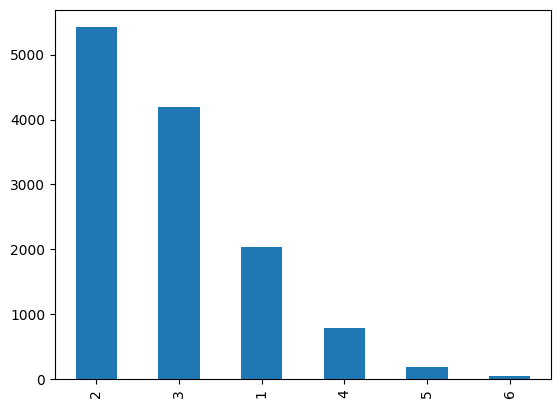

In [133]:
rooms_count = new_data['rooms'].value_counts()
rooms_count.plot.bar()

Самые частые объявления квартир с 2-мя и 3-мя комнатами.

In [84]:
true_apart = new_data.query('is_apartment == True')
true_apart

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,floor_value,day_of_week,month,year,city_сenters_nearest_km,airports_nearest_km,ponds_nearest_km,parks_nearest_km,price_of_meter
2975,9,4931398.0,42.9,2018-07-23,1,3.15,4.0,20.390000,3,True,...,273.0,другой,0,7,2018,20.802,44.870,0.792,NaN,114951.002331
3067,13,6600000.0,95.0,2018-09-08,2,4.50,7.0,45.000000,7,True,...,96.0,последний,5,9,2018,NaN,NaN,NaN,NaN,69473.684211
3816,4,4779000.0,53.1,2016-05-16,1,2.65,13.0,19.800000,6,True,...,60.0,другой,0,5,2016,4.516,19.396,0.826,NaN,90000.000000
5654,20,9200000.0,116.0,2019-04-26,3,3.20,5.0,68.000000,5,True,...,NaN,последний,4,4,2019,NaN,NaN,NaN,NaN,79310.344828
6523,11,7500000.0,82.0,2019-04-20,2,3.00,11.0,30.000000,9,True,...,NaN,другой,5,4,2019,11.367,10.143,NaN,NaN,91463.414634
7056,8,3500000.0,56.4,2016-04-06,2,2.60,5.0,31.000000,2,True,...,635.0,другой,2,4,2016,NaN,NaN,NaN,NaN,62056.737589
8252,15,12750000.0,102.0,2018-10-17,3,2.80,7.0,61.000000,4,True,...,172.0,другой,2,10,2018,31.886,26.100,0.472,0.332,125000.000000
8611,6,6030000.0,50.4,2018-02-20,2,3.10,4.0,37.000000,2,True,...,NaN,другой,1,2,2018,21.700,45.767,0.576,NaN,119642.857143
15788,16,6390000.0,58.7,2018-03-18,1,3.12,4.0,31.500000,3,True,...,114.0,другой,6,3,2018,21.689,44.870,0.789,NaN,108858.603066
16166,13,4792000.0,49.0,2017-08-07,1,3.12,4.0,21.000000,3,True,...,337.0,другой,0,8,2017,20.802,44.870,0.792,NaN,97795.918367


Квартиры, которые подходят под определение "апартаменты" (коммерческая недвижимость) очень мало. Непонятно, что именно у них общего.

<AxesSubplot:>

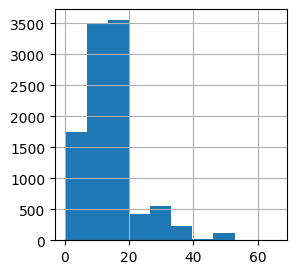

In [141]:
new_data['city_сenters_nearest_km'].hist(figsize = (3,3))

Возможно, если расcтояние до центра очень маленькое, то квартира может располагаться в центре города

In [92]:
new_data.pivot_table(index = 'locality_name', values = 'city_сenters_nearest_km', aggfunc = ['mean', 'median'])

,mean,median
,city_сenters_nearest_km,city_сenters_nearest_km
locality_name,,
Александровская,27.468000,27.4680
Лисий Нос,28.226000,28.2260
Металлострой,27.480939,27.4700
Молодежное,65.858000,65.8580
Парголово,20.456036,19.8940
Песочный,27.835000,27.8350
Понтонный,32.016000,31.8380
Саперный,35.822000,35.8220


Всё выглядит достаточно логично. Если квартира в Санкт-Петербурге, то расстояние до центра ближе, если пригород - дальше.

***Этаж квартиры и его тип***

In [117]:
table_floors = new_data.pivot_table(index = 'floor_value', values = ['last_price', 'price_of_meter'], aggfunc = ['count', 'median'])
table_floors.columns = ['count_of_flats', 'count', 'median_last_price', 'median_price_of_menter']
display(table_floors[['count_of_flats', 'median_last_price', 'median_price_of_menter']])

,count_of_flats,median_last_price,median_price_of_menter
floor_value,,,
другой,9401,5500000.0,96322.241681
первый,1541,4700000.0,81009.296149
последний,1720,5050000.0,87006.004748


***Общее количество этажей в доме***

Можно заметить, что цены за квадратных метр на первом и последних этажах ниже, чем на других этажах.

In [125]:
table_total_floors = new_data.pivot_table(index = 'floors_total', values = 'floor_value', aggfunc = 'count')
table_total_floors

,floor_value
floors_total,
1.0,14
2.0,175
3.0,354
4.0,629
5.0,2565
6.0,544
7.0,316
8.0,160
9.0,2358


<AxesSubplot:>

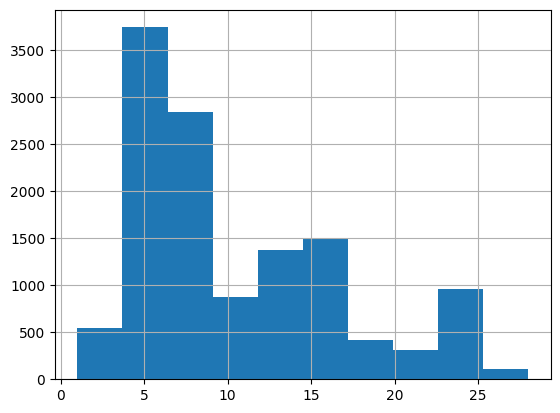

In [123]:
new_data['floors_total'].hist()

Наибольшее количество квартир в домах, где 5 и 9 этажей. Самые частые объявления, где количество этажей от 4 до 10.

***Близость квартиры к аэропортам, прудам и паркам***

<AxesSubplot:>

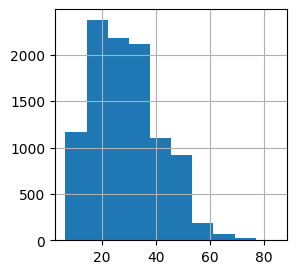

In [142]:
new_data['airports_nearest_km'].hist(figsize = (3,3))

Так как аэропорт в Санкт-Петербурге расположен не очень далеко от города, то близкое расположение квартиры к нему будет удобно покупателям, кто часто путешествует или летает самолётом по работе.

<AxesSubplot:>

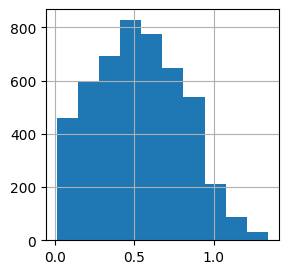

In [143]:
new_data['ponds_nearest_km'].hist(figsize = (3,3))

Очень близкое расположение прудов заставляет задуматься. Возможно рядом и правда есть какие-то небольшие водоёмы.

<AxesSubplot:>

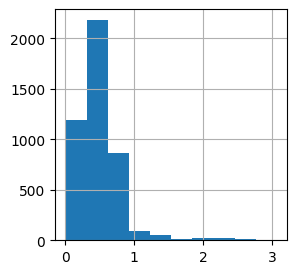

In [144]:
new_data['parks_nearest_km'].hist(figsize = (3,3))

Но видимо квартиры находятся рядом с парками, поэтому наличие прудов рядом может быть обосновано этим - ведь в парках обычно есть пруды. 

***День и месяц публикации объявления***

In [129]:
import seaborn 

In [128]:
day_and_month = new_data.pivot_table(index = 'day_of_week', columns = 'month', values = 'last_price', aggfunc = 'count')
day_and_month

month,1,2,3,4,5,6,7,8,9,10,11,12
day_of_week,,,,,,,,,,,,
0,140,186,231,224,93,114,153,149,147,199,174,132
1,125,256,269,214,128,157,177,187,197,228,214,153
2,132,198,221,187,142,141,148,191,230,188,229,129
3,97,406,212,232,146,201,142,146,159,190,254,132
4,120,182,210,239,120,181,112,148,170,205,285,120
5,73,89,115,92,36,79,87,72,86,74,91,86
6,52,86,106,95,31,56,71,67,100,73,86,67


Сложно сравнивать количество объявлений по разным дням недели и месяцам. Лучше построим хитмэп.

<AxesSubplot:xlabel='month', ylabel='day_of_week'>

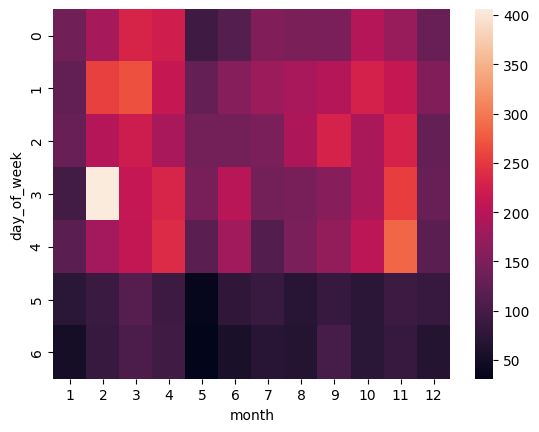

In [132]:
seaborn.heatmap(day_and_month)

В течение всего года, меньше объявлений выставлялось по выходным (в субботу и в воскресенье). Большое количество объявлений за период были выложены по четвергам в феврале. \
Чаще всего по будням выкладывали объявления в феврале, марте, апреле. После этого было снижение публикации объявлений, а с осени наблюдался снова рост (с сентбря по ноябрь). \
Возможно, у продаж квартир есть некоторая сезонность, связанная с ростом спроса на них и активность продавцов. В декабре и январе было опубликовано меньше всего объявлений.

### Теперь переходим к вопросам исследования.

Рассмотрим сроки продажи.

<AxesSubplot:>

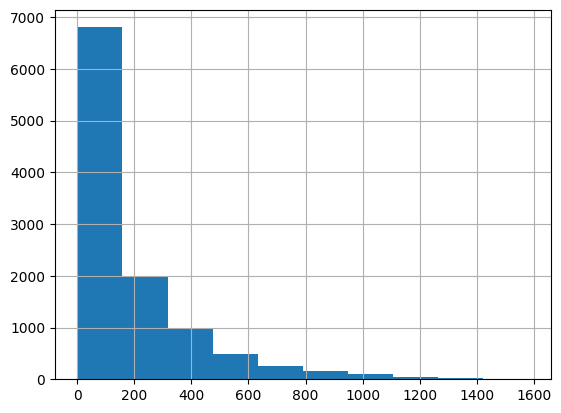

In [145]:
new_data['days_exposition'].hist()

In [164]:
display('Средний срок объявления:', new_data['days_exposition'].mean())
display('Медианный срок объявления:', new_data['days_exposition'].median())

'Средний срок объявления:'

189.29018021331373

'Медианный срок объявления:'

105.0

В основном, объявления "висят" меньше года. Но есть и исключения, которые опубликованы уже более 2-х и 3-х лет. Может, слишком высокая цена или неудобное расположение квартиры? А может быть, это коммерческие объявления, которые и не нацелены на продажу (то есть те самые "апартаменты",  в которыз встречается очень много пропусков). Для исправления нужно получить дополнительные данные правда это или нет.

***Быстрые и долгие продажи***

Быстрой продай можно назвать ту, которая была совершена за срок меньший или равный мидианному сроку размещения. Долгая продажа та, что превышает средний срок примерно в 1,5 или в 2 раза.

<AxesSubplot:ylabel='Frequency'>

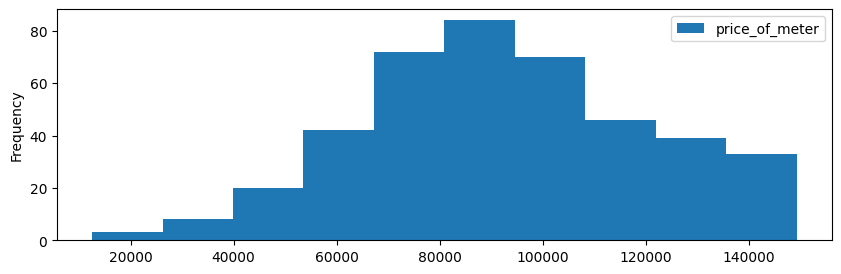

In [156]:
new_data.query('days_exposition > 730').sort_values(by = 'price_of_meter', ascending = True).plot(y = 'price_of_meter', kind = 'hist', figsize = (10, 3), grid = False)

Здесь встречаются очень низкие цены квадратного метра - скорее всего это мошенники и поэтому данное объвление всё еще не снято с публикации.

<AxesSubplot:ylabel='Frequency'>

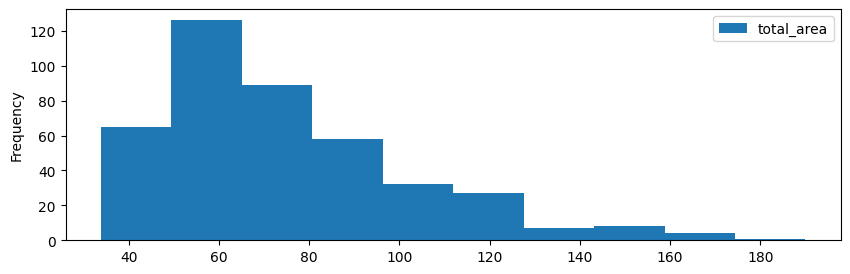

In [159]:
new_data.query('days_exposition > 730').sort_values(by = 'total_area', ascending = True).plot(y = 'total_area', kind = 'hist', figsize = (10, 3), grid = False)

Есть достаточно небольшие квартиры, но большинство - средней площади.

<AxesSubplot:ylabel='Frequency'>

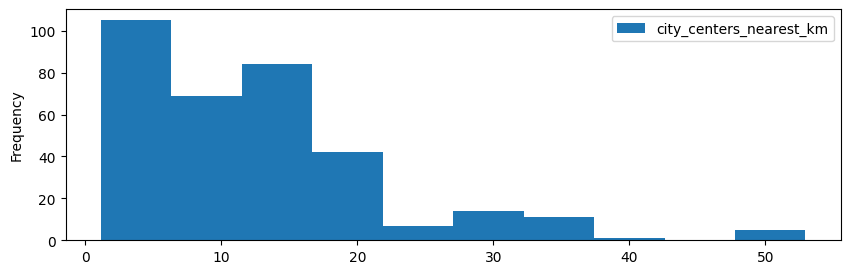

In [165]:
new_data.query('days_exposition > 730').sort_values(by = 'city_сenters_nearest_km', ascending = True).plot(y = 'city_сenters_nearest_km', kind = 'hist', figsize = (10, 3), grid = False)

Догадка насчёт "коммерческих объявлений" может оказаться верна, поскольку большиство квартир с долгим сроком размещения находятся близко к центру города. Поэтому можно предположить, что эти объвления - это аренда квартир, а не их продажа.

### Влияние факторов на стоимость объекта

In [180]:
corr = data[['last_price',\
           'total_area',\
            'living_area',\
           'kitchen_area',\
           'rooms',\
           'days_exposition',\
            ]].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,living_area,kitchen_area,rooms,days_exposition
last_price,1.000000,0.658542,0.540823,0.519262,0.378982,0.106865
total_area,0.658542,1.000000,0.923879,0.563761,0.787431,0.160483
living_area,0.540823,0.923879,1.000000,0.320512,0.872238,0.144082
kitchen_area,0.519262,0.563761,0.320512,1.000000,0.193064,0.097528
rooms,0.378982,0.787431,0.872238,0.193064,1.000000,0.117989
days_exposition,0.106865,0.160483,0.144082,0.097528,0.117989,1.000000


При помощи вычисления корреляции можно сделать вывод, что на общую стоимость объекта в наибольшей степени влияет общая площадь, чуть меньше жилая площадь и площадь кухни.

#### Общая площадь

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

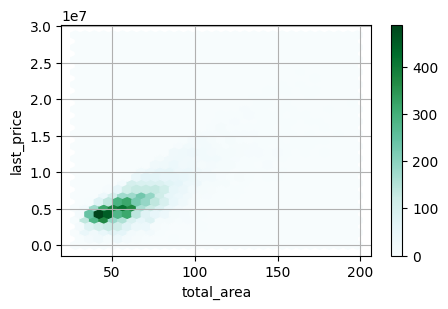

In [186]:
new_data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=30, figsize=(5, 3), sharex=False, grid=True) 

Взаимосвязь между ценой и общей площадью достаточно большая, что и логично: квартиры с большей площадью имеют более высокую цену.

#### Жилая площадь

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

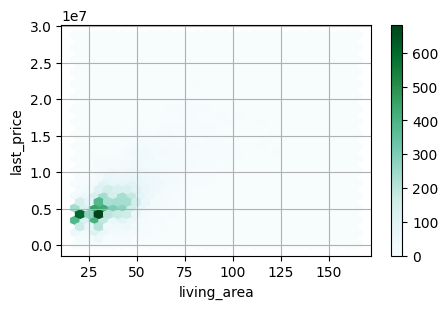

In [190]:
new_data.plot(x='living_area', y='last_price', kind='hexbin', gridsize=30, figsize=(5, 3), sharex=False, grid=True) 

Здесь уже зависимость чуть слабее. Например, это может быть связано с тем, что люди вместо больших комнат, выбирают более просторные кухни и ванные комнаты. Аналогичная картина и с площадью кухни.

#### Количество комнат

In [191]:
new_data.pivot_table(columns = 'rooms', values = 'last_price', aggfunc = ['count', 'median'])

count                               median                        \
rooms          1     2     3    4    5   6          1          2          3   
last_price  2031  5418  4188  784  195  46  4108100.0  4990000.0  6300000.0   

                                               
rooms               4           5           6  
last_price  8822500.0  11500000.0  13015000.0

<AxesSubplot:>

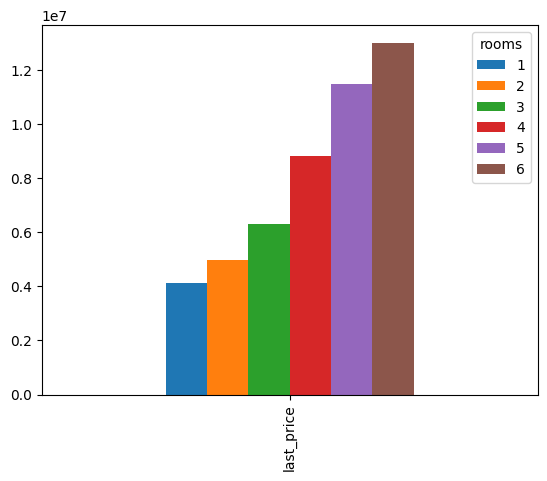

In [194]:
new_data.pivot_table(columns = 'rooms', values = 'last_price', aggfunc = 'median').plot(kind = 'bar')

Опять же, логично, ведь чем больше количество комнат, тем выше цена за квартиру.

#### Тип этажа

<AxesSubplot:xlabel='floor_value'>

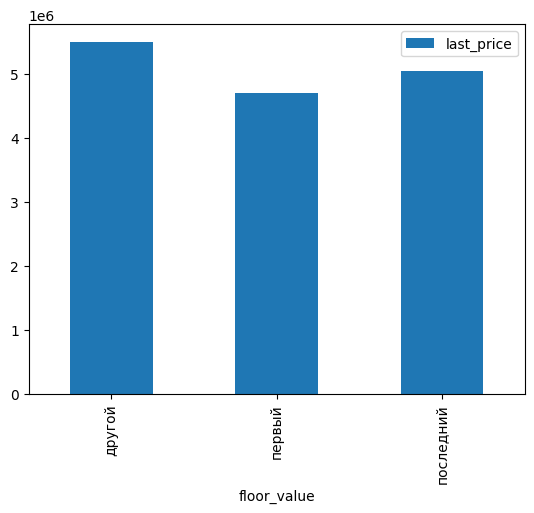

In [196]:
new_data.pivot_table(index = 'floor_value', values = 'last_price', aggfunc = 'median').plot(kind = 'bar')

Стоимость квартиры на первом этаже самая низкая, так как это считается менее удобно и престижно жить на первом этаже. Наиболее комфортные и удобные - это этаже "посередине", то есть "другие". А стоимость квартиры на последнем этаже - что-то среднее между предыдущими двумя.

#### Дата размещения

In [206]:
d = new_data.pivot_table(columns = 'day_of_week', values = 'last_price', aggfunc = 'median')
d

day_of_week,0,1,2,3,4,5,6
last_price,5345000.0,5300000.0,5350000.0,5450000.0,5390000.0,5300000.0,5300000.0


<AxesSubplot:xlabel='day_of_week'>

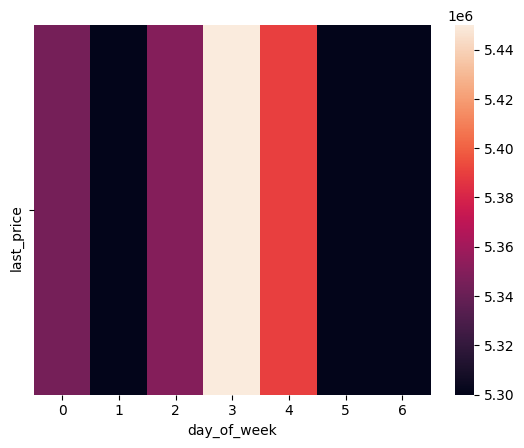

In [207]:
seaborn.heatmap(d)

Чаще всего дорогие выкладываются объявления в четверг и в пятницу, а самые дешевые в выходные и вторник. Почему так?\
Возможно, агенты по недвижимости в начале недели находят клиентов и заключают с ними договор, а к конце рабочей недели публикуют их объявления (потому что через агентов по недвижимости обычно продают более дорогие квартиры). \
Возможно, в выходные публикуются больше частных объявлений о продаже, которые не могут позволить себе услуги агента - поэтому и цена ниже.

In [204]:
m = new_data.pivot_table(columns = 'month', values = 'last_price', aggfunc = 'median')
m

month,1,2,3,4,5,6,7,8,9,10,11,12
last_price,5400000.0,5300000.0,5500000.0,5400000.0,5150000.0,5200000.0,5350000.0,5395000.0,5400000.0,5300000.0,5400000.0,5590000.0


Построим лучше хитмэп 

<AxesSubplot:xlabel='month'>

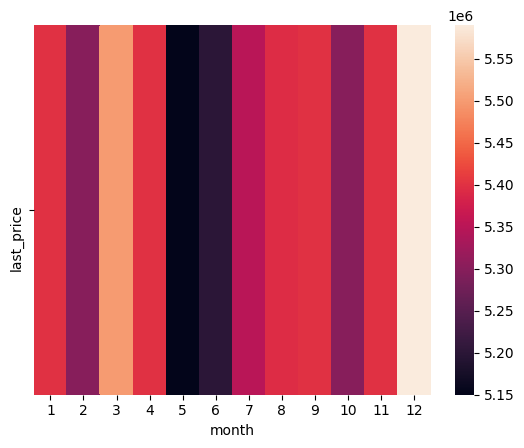

In [205]:
seaborn.heatmap(m)

Если смотреть по месяцам, то наиболее дорогие объявления были выложены в декабре, а самые дешевые - в мае. Спад цен идет в мае, июне и июле. Примерно на одинаковом уровне цен находятся объявления за январь, август, сентябрь и ноябрь.

In [208]:
y = new_data.pivot_table(columns = 'year', values = 'last_price', aggfunc = 'median')
y

year,2014,2015,2016,2017,2018,2019
last_price,6750000.0,5780000.0,5300000.0,5200000.0,5300000.0,5600000.0


<AxesSubplot:>

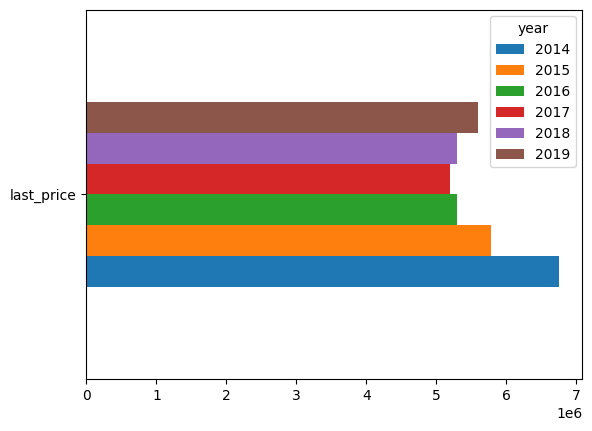

In [209]:
y.plot(kind='barh')

Самые дорогие объявления были выставлены аж в 2014 году! И они всё еще опубликованы. А вот динамика цен за 2017 - 2019 положительная. Цены на эти квартиры стали выше. Это может быть связано также с тем, что данные квартиры новее.

#### Выводы

1) Очевидно, что на цену влияет общая площадь продаваемой квартиры, жилая площадь и площадь кухонь,  а также количество комнат. \
2) Если этаж выбираемой квартиры первый или последний, то цена будет ниже. \
3) Отслеживать самые дешевые объявления нужно в мае-июле и желательно в выходные дни. \
4) Стоит обратить внимание на объявления за 2016-2017 годы (так как они самые низкие по цене). И возможно дополнительно разобраться с теми объявлениями, что висят на сайте с 2014 года (актульны ли они и если да, то возможно нужна скидка продавца, чтобы простимулировать продажи). Либо определить их к типу коммерческой недвижимости, которая нацелена только на сдачу в аренду.

***Рачёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. \
Выделение населённых пунктов с самой высокой и низкой стоимостью квадратного метра.***

In [231]:
top_ten = new_data.groupby('locality_name').agg({'locality_name':'count','price_of_meter':'mean'})
top_ten.columns = ['locality_name_count', 'price_of_meter_mean']
top_ten= top_ten.sort_values('locality_name_count', ascending=False).head(11)
top_ten

,locality_name_count,price_of_meter_mean
locality_name,,
Санкт-Петербург,8907,102946.988605
Шушары,263,74905.688085
Всеволожск,244,67374.851465
Колпино,198,72990.246158
Пушкин,186,101497.550673
Мурино,179,79150.477979
Гатчина,138,69027.029078
Парголово,138,82644.505767
Сестрорецк,108,97866.868529


<AxesSubplot:xlabel='locality_name'>

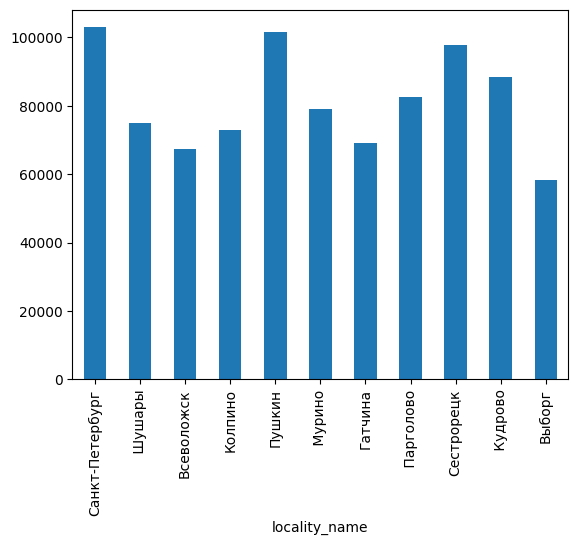

In [235]:
top_ten['price_of_meter_mean'].plot(kind = 'bar')

Таким образмом, самый дорогой квадратный метр - в Санкт-Петербурге (что логично), а также в Пушкино и Сестрорецке. Видимо, там либо удобное местоположение или чистый район. Самый дешевый квадратный метр - в Выборге.

#### Выделение квартир в Санкт-Петербурге и вычисление средней цены каждого километра до центра города. Как стоимость объектов зависит от расстояния до центра города?

In [239]:
s_p = new_data.query('locality_name == "Санкт-Петербург"').copy()
s_p.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,floor_value,day_of_week,month,year,city_сenters_nearest_km,airports_nearest_km,ponds_nearest_km,parks_nearest_km,price_of_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,NaN,другой,3,3,2019,16.028,18.863,0.755,0.482,120370.370370
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,558.0,другой,3,8,2015,13.933,21.741,0.574,0.090,92785.714286
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,121.0,другой,1,6,2018,8.098,31.856,0.048,0.112,100000.000000
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,True,...,289.0,другой,6,2,2017,15.008,50.898,NaN,NaN,88524.590164
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,True,...,137.0,другой,3,11,2017,13.878,38.357,0.553,0.310,127525.252525


In [243]:
price_km = s_p['last_price'].sum() / s_p['city_сenters_nearest_km'].sum()
price_km

595939.5779769522

***Вывод*** \
Цена близости к центру достаточно большая, что объясняется доступностью инфраструктуры и сокращением потерь времени (например, до работы). Также цена в центре выше из-за того, что в центре уже практически не строятся новые жилые дома, а спрос на квартиры близкие к центру остается высоким, что тоже повышает цену. Плюс в центре города дома могут иметь историческую ценность, что повышает стоимость располагающихся в них квартир.

### Общий вывод

In [157]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12662 entries, 0 to 23695
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             12662 non-null  int64         
 1   last_price               12662 non-null  float64       
 2   total_area               12662 non-null  float64       
 3   first_day_exposition     12662 non-null  datetime64[ns]
 4   rooms                    12662 non-null  int64         
 5   ceiling_height           12662 non-null  float64       
 6   floors_total             12662 non-null  float64       
 7   living_area              12662 non-null  float64       
 8   floor                    12662 non-null  int64         
 9   is_apartment             12662 non-null  object        
 10  studio                   12662 non-null  bool          
 11  open_plan                12662 non-null  bool          
 12  kitchen_area             12662 n

### Общий вывод

- Чаще всего квартиры в Санкт-Петербурге стоят дороже, чем в пригороде, но есть и отдельные квартиры (видимо новая застройка или элитная недвижимость), которые стоят дорого и не находятся в Санкт-Петербурге
Есть высокая зависимость конечной цены от площади квартиры и количества комнат. Также важное значение имеет близость к центру Санкт-Петербурга.
\
- Если хочется найти квартиру дешевле, то нужно рассматривать либо первый, либо последний этажи.
\
- Насчёт даты, месяца и года опубликованных объявлений нельзя сказать однозначно, влияет ли это на стоимость. Тут больше дело случая и желания людей продавать квартиру. Но возможно есть определенная зависимость в месяцы - с мая по июль.
\
- Есть ряд квартир, которые уже продаются крайне долго и на них нужно обратить дополнительное внимание и собрать информацию, чтобы сделать корректные выводы.


### Рекомендации

- Добавить критерии для коммерческой недвижимости (апартаментов)
- Повысить работу автоматических расчётов расстояний до центра, водоемов, парков и аэропортом, чтобы не было пропусков
- Для избежания дубликатов в названиях создать автоматизированное заполнение при вводе (когда система предлагает выбрать адрес, например, на карте)
- Сразу указывать расстояния в километрах 
- Добавить лимиты по максимальным ценам квартир, исходя из количества комнат, площади, района (или выводить предупреждение, если цена сильно отличается от рыночной цены на подобный тип квартир за последний период - например, за год) 
- Снимать с публикации объявления с большим сроком или присылать уведомления пользователю о том, что стоит обновить информацию о квартире (может быть, квартира уже продана, а объявление всё еще "висит" или пользователь уже давно неактивен)

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод